<a href="https://colab.research.google.com/github/batio3/Corr_analys/blob/main/Corr_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


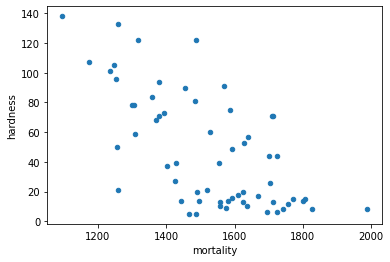

In [ ]:
# визуализируем взаимосвязь между смертностью и жетскостью воды
df.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
# считаем коэф. корреляции Пирсона
df[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
# считаем коэф. корреляции Спирмана
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['mortality']]
y = df['hardness']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=37)

In [ ]:
X_train.shape

(42, 1)

In [ ]:
X_test.shape

(19, 1)

In [ ]:
y_train.shape

(42,)

In [ ]:
y_test.shape

(19,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model.coef_

array([-0.11249357])

In [ ]:
model.intercept_

216.61937306914123

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([10.98112428, 68.35284577, 38.09207503, 22.68045572, 58.90338576,
       63.74060934, 38.76703646, 76.33988935, 41.3543886 , 13.34348929,
       69.59027506, 62.61567362, 24.93032716, 32.12991573, 41.69186932,
       74.98996649, 35.61721645, 61.60323148, 19.19315501])

In [ ]:
y_test

29      8
18    122
49     75
36      6
27     37
9      84
32     14
0     105
5      10
6      15
13     78
47     68
30     26
52     57
16     39
34    133
4      18
60     71
11     12
Name: hardness, dtype: int64

In [ ]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации

0.5816128284491524

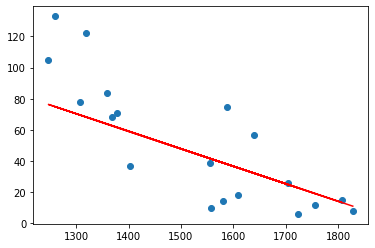

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [ ]:
model.predict(X) #Предсказываем результат

array([76.33988935, 28.98009573, 51.70379718, 14.13094429, 35.61721645,
       41.3543886 , 13.34348929, 70.49022363, 32.46739645, 63.74060934,
       60.02832148, 19.19315501, 45.74163789, 69.59027506, 75.55243435,
       48.89145789, 41.69186932, 55.9785529 , 68.35284577, 74.87747292,
       22.7929493 , 61.49073791, 20.65557144, 39.55449146, 40.11695931,
       93.32641866, 37.64210074, 58.90338576, 17.28076429, 10.98112428,
       24.93032716, 25.1553143 , 38.76703646, 69.36528792, 74.98996649,
       56.09104647, 22.68045572, 84.4394265 , 49.45392575, 52.8287329 ,
       25.83027573, 77.57731864, 24.14287215, 54.17865576, 37.64210074,
       -6.90535359, 48.44148361, 62.61567362, 75.21495364, 38.09207503,
       23.91788501, 41.46688217, 32.12991573, 24.3678593 , 33.81731931,
       33.81731931, 44.84168932, 33.59233216, 49.45392575, 49.56641932,
       61.60323148])

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=37)

In [ ]:
X_const = sm.add_constant(X_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X_const

,const,mortality
48,1.0,1257
46,1.0,1495
20,1.0,1723
37,1.0,1175
54,1.0,1625
1,1.0,1668
55,1.0,1625
33,1.0,1309
51,1.0,1557
14,1.0,1254


In [ ]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     19.22
Date:                Wed, 25 Jan 2023   Prob (F-statistic):           8.23e-05
Time:                        08:35:51   Log-Likelihood:                -202.82
No. Observations:                  42   AIC:                             409.6
Df Residuals:                      40   BIC:                             413.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        216.6194     39.386      5.500      0.0

In [ ]:
#Коэффицент детерминации R-squared:0.325, т.е. в 32,5% случаев смертей, можно объяснить связь с жесткостью воды

In [ ]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  const        216.619373
mortality     -0.112494
dtype: float64
R2:  0.324525019145837


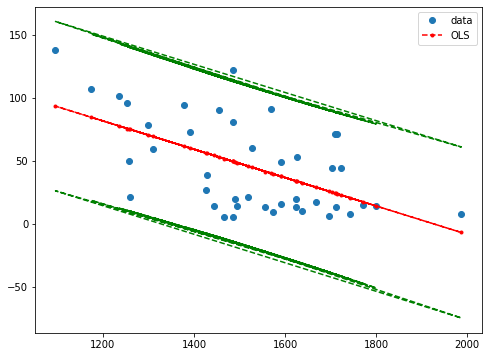

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(results) 
# для каждой точки получаем не просто сам прогноз, но и доверительный интервал
# с увеличением количества факторов, этот интервал будет уменьшаться
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X_const.iloc[:, 1], y_train, 'o', label="data")
ax.plot(X_const.iloc[:, 1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X_const.iloc[:, 1], iv_u, 'g--')
ax.plot(X_const.iloc[:, 1], iv_l, 'g--')
ax.legend(loc='best')

Text(0, 0.5, 'Остатки')

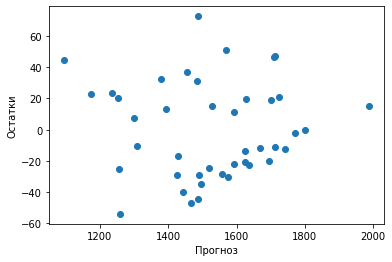

In [ ]:
# посмотрим на остатки
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

In [ ]:
df_ = df.copy()
df_.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [ ]:
df_.sort_values(['location']).reset_index()

,index,Unnamed: 0,location,town,mortality,hardness
0,30,31,North,Middlesbrough,1704,26
1,23,24,North,Huddersfield,1574,9
2,22,23,North,Halifax,1742,8
3,60,61,North,York,1378,71
4,20,21,North,Gateshead,1723,44
...,...,...,...,...,...,...
56,56,57,South,Walsall,1527,60
57,2,3,South,Birmingham,1466,5
58,10,11,South,Bristol,1392,73
59,39,40,South,Portsmouth,1456,90


In [ ]:
a = 0
b = 0
for i in df_['location']:
  if i == 'North':
    a += 1
  elif i == 'South':
    b += 1
print(a)
print(b)

35
26


In [ ]:
df_1 = df_.sort_values(['location']).reset_index().iloc[:35]
df_2 = df_.sort_values(['location']).reset_index().iloc[35:]
#df_1
df_2

,index,Unnamed: 0,location,town,mortality,hardness
35,13,14,South,Coventry,1307,78
36,14,15,South,Croydon,1254,96
37,34,35,South,Norwich,1259,133
38,33,34,South,Northampton,1309,59
39,32,33,South,Newport,1581,14
40,18,19,South,East Ham,1318,122
41,27,28,South,Leicester,1402,37
42,25,26,South,Ipswich,1096,138
43,37,38,South,Oxford,1175,107
44,19,20,South,Exeter,1260,21


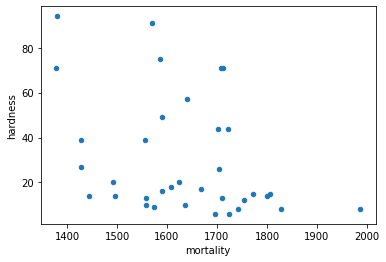

In [ ]:
# визуализируем взаимосвязь между смертностью и жетскостью воды на севере
df_1.plot(kind='scatter', x='mortality', y='hardness')

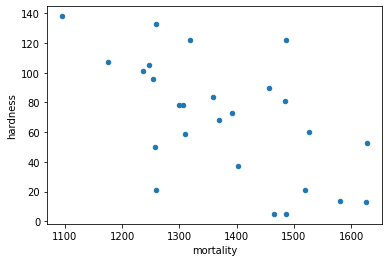

In [ ]:
# визуализируем взаимосвязь между смертностью и жетскостью воды на юге
df_2.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
X1 = df_1[['mortality']]
y1 = df_1['hardness']

In [ ]:
X2 = df_2[['mortality']]
y2 = df_2['hardness']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=37)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=37)

In [ ]:
model = LinearRegression()
model.fit(X1_train, y1_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model = LinearRegression()
model.fit(X2_train, y2_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [ ]:
model.score(X1_test, y1_test) # метод возвращает значение коэффициента детерминации

0.0727861952038199

In [ ]:
model.score(X2_test, y2_test) # метод возвращает значение коэффициента детерминации

0.37842190300621414

In [ ]:
y_pred1 = model.predict(X1_test)
y_pred1

array([32.43462244, 16.11998789, 69.95828191, 16.93571962, 27.86652477,
       29.82428091,  1.27367045, 10.73615849, 51.68589121, 13.83593905,
       61.96411098])

In [ ]:
y_pred2 = model.predict(X2_test)
y_pred2

array([116.1286977 ,  79.91020899,  66.20591597,  89.37269703,
        91.49359952,  57.39601331,  37.00272012,  81.70481879])

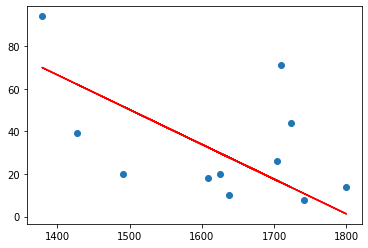

In [ ]:
plt.scatter(X1_test, y1_test)
plt.plot(X1_test, y_pred1, c='r')
#Для севера

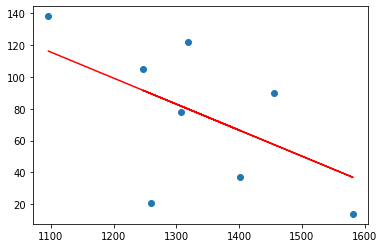

In [ ]:
plt.scatter(X2_test, y2_test)
plt.plot(X2_test, y_pred2, c='r')
#Для юга

In [ ]:
# Альтернативный способ из statsmodel

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30, random_state=37)

In [ ]:
X1_const = sm.add_constant(X1_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X1_const

,const,mortality
20,1.0,1569
34,1.0,1713
23,1.0,1702
1,1.0,1574
29,1.0,1591
19,1.0,1640
14,1.0,1668
33,1.0,1696
18,1.0,1557
27,1.0,1711


In [ ]:
#Метод наименьших квадратов

In [ ]:
model = sm.OLS(y1_train, X1_const)
results = model.fit()
print(results.summary())
#коэффициент детерминации для севера R-squared: 0.106

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.610
Date:                Wed, 25 Jan 2023   Prob (F-statistic):              0.120
Time:                        09:57:24   Log-Likelihood:                -110.48
No. Observations:                  24   AIC:                             225.0
Df Residuals:                      22   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        128.6248     61.781      2.082      0.0

Text(0, 0.5, 'Остатки')

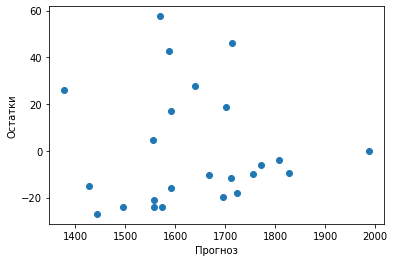

In [ ]:
# посмотрим на остатки
plt.scatter(x=X1_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=37)

In [ ]:
X2_const = sm.add_constant(X2_train) # техническая особенность библиотеки, надо руками добавить константу

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
X2_const

,const,mortality
51,1.0,1625
48,1.0,1519
36,1.0,1254
54,1.0,1369
49,1.0,1236
52,1.0,1486
58,1.0,1392
37,1.0,1259
55,1.0,1257
53,1.0,1627


In [ ]:
model = sm.OLS(y2_train, X2_const)
results = model.fit()
print(results.summary())
#коэффициент детерминации для юга R-squared: 0.34

                            OLS Regression Results                            
Dep. Variable:               hardness   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     8.256
Date:                Wed, 25 Jan 2023   Prob (F-statistic):             0.0110
Time:                        10:00:19   Log-Likelihood:                -86.901
No. Observations:                  18   AIC:                             177.8
Df Residuals:                      16   BIC:                             179.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        294.9371     79.632      3.704      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Text(0, 0.5, 'Остатки')

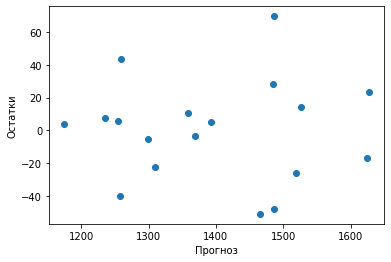

In [ ]:
# посмотрим на остатки
plt.scatter(x=X2_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

In [ ]:
#Можно сделать следующий вывод, смертность на юге намного сильнее зависит от жесткости воды, чем на севере,
#но в целом, смертность от жесткости воды зависит не сильно